In [1]:
import pathlib
import numpy as np
import pandas as pd
import xarray as xr
import tobac

In [2]:
data_path = pathlib.Path("/scratch/b/b382728/tobac_features/2020/01/01")

In [3]:
files = sorted(list(data_path.glob("*_ICON_feature_mask_file.nc")))
len(files)

24

In [4]:
ds = xr.open_dataset(files[0]).drop_vars("all_feature_labels").drop_dims(["time","lat","lon"])
ds

<xarray.Dataset> Size: 351kB
Dimensions:                   (feature: 1595)
Coordinates:
  * feature                   (feature) int64 13kB 1 2 3 4 ... 1593 1594 1595
Data variables: (12/18)
    frame                     (feature) int64 13kB ...
    idx                       (feature) int64 13kB ...
    y                         (feature) float64 13kB ...
    x                         (feature) float64 13kB ...
    detection_pixel_count     (feature) int64 13kB ...
    threshold_value           (feature) int64 13kB ...
    ...                        ...
    mean_BT                   (feature) float64 13kB ...
    mean_OLR                  (feature) float64 13kB ...
    min_OLR                   (feature) float64 13kB ...
    area                      (feature) float64 13kB ...
    max_precip                (feature) float64 13kB ...
    total_precip              (feature) float64 13kB ...

In [5]:
ds.to_dataframe()

,frame,idx,y,x,detection_pixel_count,threshold_value,min_BT,time_feature,timestr,latitude,longitude,segmentation_pixel_count,mean_BT,mean_OLR,min_OLR,area,max_precip,total_precip
feature,,,,,,,,,,,,,,,,,,
1,0,2,7.815884,643.836223,831,241,233.705505,2020-01-01 00:15:00,2020-01-01 00:15:00,59.168412,64.433622,846,237.460403,156.604797,149.429733,5.356049e+10,0.006461,2.390801e+07
2,0,4,11.509915,970.005675,353,241,238.412430,2020-01-01 00:15:00,2020-01-01 00:15:00,58.799008,97.050568,362,240.019028,161.537827,158.179642,2.316715e+10,0.125598,1.204866e+09
3,0,5,7.051809,1211.703854,1216,241,236.143982,2020-01-01 00:15:00,2020-01-01 00:15:00,59.244819,121.220385,1241,238.771408,159.119354,153.960556,7.840319e+10,0.032911,2.696499e+08
4,0,7,1.135135,1599.864862,37,241,240.448639,2020-01-01 00:15:00,2020-01-01 00:15:00,59.836486,160.036486,41,240.603867,162.677612,162.325394,2.545766e+09,0.000288,5.681505e+05
5,0,8,3.935065,1620.363642,77,241,238.861084,2020-01-01 00:15:00,2020-01-01 00:15:00,59.556494,162.086364,86,240.202042,161.894150,158.714951,5.382039e+09,0.117203,1.773175e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,2,1884,860.647059,583.529412,34,225,221.525040,2020-01-01 00:45:00,2020-01-01 00:45:00,-26.114706,58.402941,324,231.169830,144.898514,126.196861,3.605762e+10,30.982542,6.497649e+10
1592,2,1885,867.378788,605.666671,66,225,222.825745,2020-01-01 00:45:00,2020-01-01 00:45:00,-26.787879,60.616667,305,228.766342,140.452713,128.944351,3.375368e+10,34.945904,3.248844e+11
1593,2,1888,891.399319,621.012809,2056,225,210.561157,2020-01-01 00:45:00,2020-01-01 00:45:00,-29.189932,62.151281,10303,229.676071,142.226654,108.938156,1.090848e+12,31.080023,8.803418e+11


In [6]:
rename_vars = {
    "time_feature":"time" ,
    "y":"hdim_1",
    "x":"hdim_2",
}
    

In [7]:
combined_features = tobac.utils.combine_feature_dataframes(
    [
        xr.open_dataset(f).drop_vars("all_feature_labels").drop_dims(["time","lat","lon"]).rename(rename_vars).to_dataframe().reset_index()
        for f in files
    ]
)

In [8]:
combined_features

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,latitude,longitude,segmentation_pixel_count,mean_BT,mean_OLR,min_OLR,area,max_precip,total_precip
0,1,0,2,7.815884,643.836223,831,241,233.705505,2020-01-01 00:15:00,2020-01-01 00:15:00,59.168412,64.433622,846,237.460403,156.604797,149.429733,5.356049e+10,0.006461,2.390801e+07
1,2,0,4,11.509915,970.005675,353,241,238.412430,2020-01-01 00:15:00,2020-01-01 00:15:00,58.799008,97.050568,362,240.019028,161.537827,158.179642,2.316715e+10,0.125598,1.204866e+09
2,3,0,5,7.051809,1211.703854,1216,241,236.143982,2020-01-01 00:15:00,2020-01-01 00:15:00,59.244819,121.220385,1241,238.771408,159.119354,153.960556,7.840319e+10,0.032911,2.696499e+08
3,4,0,7,1.135135,1599.864862,37,241,240.448639,2020-01-01 00:15:00,2020-01-01 00:15:00,59.836486,160.036486,41,240.603867,162.677612,162.325394,2.545766e+09,0.000288,5.681505e+05
4,5,0,8,3.935065,1620.363642,77,241,238.861084,2020-01-01 00:15:00,2020-01-01 00:15:00,59.556494,162.086364,86,240.202042,161.894150,158.714951,5.382039e+09,0.117203,1.773175e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119847,119848,94,4055,978.695652,694.565217,23,225,223.512711,2020-01-01 23:45:00,2020-01-01 23:45:00,-37.919565,69.506522,2068,232.377441,147.081787,130.206879,2.060993e+11,34.490738,4.606328e+11
119848,119849,94,4056,979.842105,2202.473683,38,225,222.883255,2020-01-01 23:45:00,2020-01-01 23:45:00,-38.034211,220.297368,484,232.522537,147.399536,129.494080,4.692677e+10,1.017282,1.777747e+09
119849,119850,94,4057,996.972010,2133.177930,393,225,220.668137,2020-01-01 23:45:00,2020-01-01 23:45:00,-39.747201,213.367793,2963,231.932968,146.330887,125.845490,2.811720e+11,6.189536,8.558705e+10
119850,119851,94,4061,1011.580645,2891.048387,62,225,218.406296,2020-01-01 23:45:00,2020-01-01 23:45:00,-41.208065,289.154839,192,228.436539,139.974533,121.555046,1.782736e+10,63.633526,6.476473e+10


In [9]:
np.where(np.isnan(combined_features["area"]))

(array([], dtype=int64),)

In [10]:
dt = 900  # in seconds
dxy = 11100  # in meter (for Latitude)
    
parameters_tracking = dict(
    d_max=2.5*dxy,
    method_linking="predict",
    adaptive_stop=0.2,
    adaptive_step=0.95,
    stubs=3,
    memory=0,
    PBC_flag="hdim_2",
    min_h2=0,
    max_h2=3600,
)

parameters_merge = dict(
    distance=dxy*10, frame_len=2, PBC_flag="hdim_2", min_h1=0, max_h1=1200, min_h2=0, max_h2=3600,
)

In [11]:
tracks = tobac.linking_trackpy(
    combined_features,
    None,
    dt,
    dxy,
    **parameters_tracking,
)

Frame 94: 1463 trajectories present.


In [12]:
unfiltered_tracks = tracks.copy()

In [13]:
tracks = unfiltered_tracks.copy()

In [14]:
track_min_threshold = tracks.groupby("cell").threshold_value.min()
valid_cells = track_min_threshold.index[track_min_threshold <= 225]
valid_cells = np.setdiff1d(valid_cells, -1)
wh_in_track = np.isin(tracks.cell, valid_cells)
tracks = tracks[wh_in_track]

In [15]:
merges = tobac.merge_split.merge_split_MEST(tracks, dxy, **parameters_merge)

In [16]:
tracks["track"] = merges.feature_parent_track_id.data.astype(np.int64)

track_start_time = tracks.groupby("track").time.min()
tracks["time_track"] = tracks.time - track_start_time[tracks.track].to_numpy()

track_max_cell_len = tracks.groupby(["track", "cell"]).size().groupby("track").max()

valid_tracks = track_max_cell_len.index[track_max_cell_len >= 5]
wh_in_track = np.isin(tracks.track, valid_tracks)
tracks = tracks[wh_in_track]

In [17]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,...,mean_BT,mean_OLR,min_OLR,area,max_precip,total_precip,cell,time_cell,track,time_track
116,117,0,239,752.543860,2081.017544,57,241,233.741135,2020-01-01 00:15:00,2020-01-01 00:15:00,...,236.553238,154.890793,149.341293,6.791115e+09,3.234744e-14,5.077178e-05,117,0 days 00:00:00,1,0 days 00:00:00
296,297,0,579,2.931034,139.241499,232,225,212.212372,2020-01-01 00:15:00,2020-01-01 00:15:00,...,229.906830,142.851746,111.817184,5.149269e+10,5.647807e-16,2.850928e-07,297,0 days 00:00:00,3,0 days 00:00:00
297,298,0,580,36.105727,1579.823794,227,225,221.150162,2020-01-01 00:15:00,2020-01-01 00:15:00,...,232.127777,146.612930,126.787910,4.940982e+11,1.139653e-01,1.481525e+09,298,0 days 00:00:00,4,0 days 00:00:00
300,301,0,583,46.243902,1599.878048,41,225,224.019547,2020-01-01 00:15:00,2020-01-01 00:15:00,...,233.829544,149.839676,131.740021,4.599726e+10,1.546943e-01,4.435317e+08,301,0 days 00:00:00,5,0 days 00:00:00
310,311,0,593,209.166667,775.797621,84,225,218.466583,2020-01-01 00:15:00,2020-01-01 00:15:00,...,229.743469,142.331161,122.214676,3.265257e+10,2.161480e-05,5.693304e+04,311,0 days 00:00:00,11,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119845,119846,94,4053,970.380952,639.952381,21,225,223.459198,2020-01-01 23:45:00,2020-01-01 23:45:00,...,232.135773,146.670807,130.416290,3.734335e+10,8.734847e+00,8.548797e+10,32208,0 days 01:00:00,2815,0 days 01:00:00
119846,119847,94,4054,973.000000,677.588242,68,225,222.780807,2020-01-01 23:45:00,2020-01-01 23:45:00,...,229.646576,142.052612,128.907578,5.299575e+10,1.799403e+01,1.291762e+11,30532,0 days 02:00:00,2664,0 days 02:00:00
119847,119848,94,4055,978.695652,694.565217,23,225,223.512711,2020-01-01 23:45:00,2020-01-01 23:45:00,...,232.377441,147.081787,130.206879,2.060993e+11,3.449074e+01,4.606328e+11,29813,0 days 02:30:00,2592,0 days 02:30:00
119848,119849,94,4056,979.842105,2202.473683,38,225,222.883255,2020-01-01 23:45:00,2020-01-01 23:45:00,...,232.522537,147.399536,129.494080,4.692677e+10,1.017282e+00,1.777747e+09,31543,0 days 01:30:00,2747,0 days 01:30:00


In [18]:
tracks.columns

Index(['feature', 'frame', 'idx', 'hdim_1', 'hdim_2', 'detection_pixel_count',
       'threshold_value', 'min_BT', 'time', 'timestr', 'latitude', 'longitude',
       'segmentation_pixel_count', 'mean_BT', 'mean_OLR', 'min_OLR', 'area',
       'max_precip', 'total_precip', 'cell', 'time_cell', 'track',
       'time_track'],
      dtype='object')

In [19]:
groupby_order = ["time", "track"]

In [20]:
tracks_copy = tracks.copy()

In [21]:
for i, (_, features) in enumerate(tracks.groupby(groupby_order).feature):
    tracks_copy.loc[features.to_numpy()-1, "cluster"] = int(i + 1)

In [22]:
clusters_loop = tracks_copy["cluster"].astype(int)

In [23]:
clusters_sort = (tracks.groupby(groupby_order).feature.cumcount()[tracks.sort_values(groupby_order).index]==0).cumsum().sort_index()

In [24]:
np.all(clusters_sort.to_numpy()==clusters_loop.to_numpy())

True

In [25]:
from tobac.utils.periodic_boundaries import weighted_circmean

def process_clusters(tracks):
    groupby_order = ["frame", "track"]
    tracks["cluster"] = (tracks.groupby(groupby_order).feature.cumcount()[tracks.sort_values(groupby_order).index]==0).cumsum().sort_index()
    
    gb_clusters = tracks.groupby("cluster")
    
    clusters = gb_clusters.track.first().to_frame().rename(columns=dict(track="cluster_track_id"))
    
    clusters["cluster_time"] = gb_clusters.time.first().to_numpy()
    
    clusters["cluster_longitude"] = gb_clusters.apply(lambda x:weighted_circmean(x.longitude.to_numpy(), x.area.to_numpy(), low=0, high=360))
    clusters["cluster_latitude"] = gb_clusters.apply(lambda x:np.average(x.latitude.to_numpy(), weights=x.area.to_numpy()))
    
    clusters["cluster_area"] = gb_clusters.area.sum().to_numpy()
    clusters["cluster_max_precip"] = gb_clusters.max_precip.max().to_numpy()
    clusters["cluster_total_precip"] = gb_clusters.total_precip.sum().to_numpy()
    
    return tracks, clusters
    

In [26]:
tracks, clusters = process_clusters(tracks)

/tmp/ipykernel_2597730/2271335783.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clusters["cluster_longitude"] = gb_clusters.apply(lambda x:weighted_circmean(x.longitude.to_numpy(), x.area.to_numpy(), low=0, high=360))
/tmp/ipykernel_2597730/2271335783.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  clusters["cluster_latitude"] = gb_clusters.apply(lambda x:np.average(x.latitude.to_numpy(), weight

In [27]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,...,mean_OLR,min_OLR,area,max_precip,total_precip,cell,time_cell,track,time_track,cluster
116,117,0,239,752.543860,2081.017544,57,241,233.741135,2020-01-01 00:15:00,2020-01-01 00:15:00,...,154.890793,149.341293,6.791115e+09,3.234744e-14,5.077178e-05,117,0 days 00:00:00,1,0 days 00:00:00,1
296,297,0,579,2.931034,139.241499,232,225,212.212372,2020-01-01 00:15:00,2020-01-01 00:15:00,...,142.851746,111.817184,5.149269e+10,5.647807e-16,2.850928e-07,297,0 days 00:00:00,3,0 days 00:00:00,2
297,298,0,580,36.105727,1579.823794,227,225,221.150162,2020-01-01 00:15:00,2020-01-01 00:15:00,...,146.612930,126.787910,4.940982e+11,1.139653e-01,1.481525e+09,298,0 days 00:00:00,4,0 days 00:00:00,3
300,301,0,583,46.243902,1599.878048,41,225,224.019547,2020-01-01 00:15:00,2020-01-01 00:15:00,...,149.839676,131.740021,4.599726e+10,1.546943e-01,4.435317e+08,301,0 days 00:00:00,5,0 days 00:00:00,4
310,311,0,593,209.166667,775.797621,84,225,218.466583,2020-01-01 00:15:00,2020-01-01 00:15:00,...,142.331161,122.214676,3.265257e+10,2.161480e-05,5.693304e+04,311,0 days 00:00:00,11,0 days 00:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119845,119846,94,4053,970.380952,639.952381,21,225,223.459198,2020-01-01 23:45:00,2020-01-01 23:45:00,...,146.670807,130.416290,3.734335e+10,8.734847e+00,8.548797e+10,32208,0 days 01:00:00,2815,0 days 01:00:00,32297
119846,119847,94,4054,973.000000,677.588242,68,225,222.780807,2020-01-01 23:45:00,2020-01-01 23:45:00,...,142.052612,128.907578,5.299575e+10,1.799403e+01,1.291762e+11,30532,0 days 02:00:00,2664,0 days 02:00:00,32184
119847,119848,94,4055,978.695652,694.565217,23,225,223.512711,2020-01-01 23:45:00,2020-01-01 23:45:00,...,147.081787,130.206879,2.060993e+11,3.449074e+01,4.606328e+11,29813,0 days 02:30:00,2592,0 days 02:30:00,32146
119848,119849,94,4056,979.842105,2202.473683,38,225,222.883255,2020-01-01 23:45:00,2020-01-01 23:45:00,...,147.399536,129.494080,4.692677e+10,1.017282e+00,1.777747e+09,31543,0 days 01:30:00,2747,0 days 01:30:00,32248


In [28]:
clusters

,cluster_track_id,cluster_time,cluster_longitude,cluster_latitude,cluster_area,cluster_max_precip,cluster_total_precip
cluster,,,,,,,
1,1,2020-01-01 00:15:00,208.151754,-15.304386,6.791115e+09,3.234744e-14,5.077178e-05
2,3,2020-01-01 00:15:00,13.974150,59.656897,5.149269e+10,5.647807e-16,2.850928e-07
3,4,2020-01-01 00:15:00,158.032379,56.339427,4.940982e+11,1.139653e-01,1.481525e+09
4,5,2020-01-01 00:15:00,160.037805,55.325610,4.599726e+10,1.546943e-01,4.435317e+08
5,11,2020-01-01 00:15:00,77.629762,39.033333,3.265257e+10,2.161480e-05,5.693304e+04
...,...,...,...,...,...,...,...
32293,2809,2020-01-01 23:45:00,67.019048,-9.373810,7.677346e+09,2.564996e+00,1.850001e+09
32294,2812,2020-01-01 23:45:00,308.812963,-16.331481,7.112319e+09,1.063514e+00,5.468618e+08
32295,2813,2020-01-01 23:45:00,23.831250,-21.368750,9.774790e+09,1.045078e+00,2.981700e+08


In [29]:
def max_consecutive_true(condition: np.ndarray[bool]) -> int:
    """Return the maximum number of consecutive True values in 'condition'

    Parameters
    ----------
    condition : np.ndarray[bool]
        numpy array of boolean values

    Returns
    -------
    int
        the maximum number of consecutive True values in 'condition'
    """
    if isinstance(condition, pd.Series):
        condition = condition.to_numpy()
    if np.any(condition):
        return np.max(
            np.diff(
                np.where(
                    np.concatenate(
                        ([condition[0]], condition[:-1] != condition[1:], [True])
                    )
                )[0]
            )[::2],
            initial=0,
        )
    else:
        return 0


def is_track_mcs(clusters: pd.DataFrame) -> pd.DataFrame:
    """Test whether each track in features meets the condtions for an MCS

    Parameters
    ----------
    features : pd.Dataframe
        _description_

    Returns
    -------
    pd.DataFrame
        _description_
    """
    consecutive_precip_max = clusters.groupby(["cluster_track_id"]).cluster_max_precip.apply(lambda x:max_consecutive_true(x>=10))
    
    consecutive_area_max = clusters.groupby(["cluster_track_id"]).cluster_area.apply(lambda x:max_consecutive_true(x>=4e10))
    
    max_total_precip = clusters.groupby(["cluster_track_id"]).cluster_total_precip.max()
    
    is_mcs = np.logical_and.reduce(
        [
            consecutive_precip_max >= 12,
            consecutive_area_max >= 12,
            max_total_precip.to_numpy() >= 2e10,
        ]
    )
    mcs_tracks =  pd.Series(data=is_mcs, index=consecutive_precip_max.index)
    mcs_tracks.index.name="track"
    return mcs_tracks


In [30]:
mcs_tracks = is_track_mcs(clusters)

In [31]:
mcs_tracks

track
1       False
3       False
4       False
5       False
11      False
        ...  
2809    False
2812    False
2813    False
2814    False
2815    False
Length: 2315, dtype: bool

In [32]:
mcs_tracks.sum()

39

In [33]:
track_is_mcs = mcs_tracks[lambda x:x].index

In [34]:
track_is_mcs

Index([  54,   56,   63,  101,  167,  189,  190,  257,  304,  323,  344,  361,
        411,  464,  514,  590,  698,  759,  805,  936,  962,  964, 1123, 1185,
       1248, 1263, 1381, 1428, 1462, 1666, 1705, 1938, 1944, 2023, 2171, 2268,
       2339, 2390, 2402],
      dtype='int64', name='track')

In [35]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,...,mean_OLR,min_OLR,area,max_precip,total_precip,cell,time_cell,track,time_track,cluster
116,117,0,239,752.543860,2081.017544,57,241,233.741135,2020-01-01 00:15:00,2020-01-01 00:15:00,...,154.890793,149.341293,6.791115e+09,3.234744e-14,5.077178e-05,117,0 days 00:00:00,1,0 days 00:00:00,1
296,297,0,579,2.931034,139.241499,232,225,212.212372,2020-01-01 00:15:00,2020-01-01 00:15:00,...,142.851746,111.817184,5.149269e+10,5.647807e-16,2.850928e-07,297,0 days 00:00:00,3,0 days 00:00:00,2
297,298,0,580,36.105727,1579.823794,227,225,221.150162,2020-01-01 00:15:00,2020-01-01 00:15:00,...,146.612930,126.787910,4.940982e+11,1.139653e-01,1.481525e+09,298,0 days 00:00:00,4,0 days 00:00:00,3
300,301,0,583,46.243902,1599.878048,41,225,224.019547,2020-01-01 00:15:00,2020-01-01 00:15:00,...,149.839676,131.740021,4.599726e+10,1.546943e-01,4.435317e+08,301,0 days 00:00:00,5,0 days 00:00:00,4
310,311,0,593,209.166667,775.797621,84,225,218.466583,2020-01-01 00:15:00,2020-01-01 00:15:00,...,142.331161,122.214676,3.265257e+10,2.161480e-05,5.693304e+04,311,0 days 00:00:00,11,0 days 00:00:00,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119845,119846,94,4053,970.380952,639.952381,21,225,223.459198,2020-01-01 23:45:00,2020-01-01 23:45:00,...,146.670807,130.416290,3.734335e+10,8.734847e+00,8.548797e+10,32208,0 days 01:00:00,2815,0 days 01:00:00,32297
119846,119847,94,4054,973.000000,677.588242,68,225,222.780807,2020-01-01 23:45:00,2020-01-01 23:45:00,...,142.052612,128.907578,5.299575e+10,1.799403e+01,1.291762e+11,30532,0 days 02:00:00,2664,0 days 02:00:00,32184
119847,119848,94,4055,978.695652,694.565217,23,225,223.512711,2020-01-01 23:45:00,2020-01-01 23:45:00,...,147.081787,130.206879,2.060993e+11,3.449074e+01,4.606328e+11,29813,0 days 02:30:00,2592,0 days 02:30:00,32146
119848,119849,94,4056,979.842105,2202.473683,38,225,222.883255,2020-01-01 23:45:00,2020-01-01 23:45:00,...,147.399536,129.494080,4.692677e+10,1.017282e+00,1.777747e+09,31543,0 days 01:30:00,2747,0 days 01:30:00,32248


In [44]:
out_ds = tracks.set_index(tracks.feature).to_xarray()

out_ds = out_ds.rename_vars(
    {
        "time": "time_feature",
        "hdim_1": "y",
        "hdim_2": "x",
        "cell": "feature_cell_id",
        "track": "feature_track_id",
        "cluster": "feature_cluster_id"  
    }
)

In [45]:
out_ds

<xarray.Dataset> Size: 7MB
Dimensions:                   (feature: 34872)
Coordinates:
  * feature                   (feature) int64 279kB 117 297 ... 119849 119850
Data variables: (12/23)
    frame                     (feature) int64 279kB 0 0 0 0 0 ... 94 94 94 94 94
    idx                       (feature) int64 279kB 239 579 580 ... 4056 4057
    y                         (feature) float64 279kB 752.5 2.931 ... 997.0
    x                         (feature) float64 279kB 2.081e+03 ... 2.133e+03
    detection_pixel_count     (feature) int64 279kB 57 232 227 41 ... 23 38 393
    threshold_value           (feature) int64 279kB 241 225 225 ... 225 225 225
    ...                        ...
    total_precip              (feature) float64 279kB 5.077e-05 ... 8.559e+10
    feature_cell_id           (feature) int64 279kB 117 297 298 ... 31543 31917
    time_cell                 (feature) timedelta64[ns] 279kB 00:00:00 ... 01...
    feature_track_id          (feature) int64 279kB 1 3 4 5 ... 2592 2747 2786
    time_track                (feature) timedelta64[ns] 279kB 00:00:00 ... 01...
    feature_cluster_id        (feature) int64 279kB 1 2 3 ... 32146 32248 32273

In [46]:
cell_track_id = tracks.groupby("cell").track.first()

In [47]:
cell_track_id

cell
117         1
297         3
298         4
301         5
311        11
         ... 
33194    2473
33195    1728
33205    2502
33211    2745
33213    2745
Name: track, Length: 3541, dtype: int64

In [48]:
clusters

,cluster_track_id,cluster_time,cluster_longitude,cluster_latitude,cluster_area,cluster_max_precip,cluster_total_precip
cluster,,,,,,,
1,1,2020-01-01 00:15:00,208.151754,-15.304386,6.791115e+09,3.234744e-14,5.077178e-05
2,3,2020-01-01 00:15:00,13.974150,59.656897,5.149269e+10,5.647807e-16,2.850928e-07
3,4,2020-01-01 00:15:00,158.032379,56.339427,4.940982e+11,1.139653e-01,1.481525e+09
4,5,2020-01-01 00:15:00,160.037805,55.325610,4.599726e+10,1.546943e-01,4.435317e+08
5,11,2020-01-01 00:15:00,77.629762,39.033333,3.265257e+10,2.161480e-05,5.693304e+04
...,...,...,...,...,...,...,...
32293,2809,2020-01-01 23:45:00,67.019048,-9.373810,7.677346e+09,2.564996e+00,1.850001e+09
32294,2812,2020-01-01 23:45:00,308.812963,-16.331481,7.112319e+09,1.063514e+00,5.468618e+08
32295,2813,2020-01-01 23:45:00,23.831250,-21.368750,9.774790e+09,1.045078e+00,2.981700e+08


In [49]:
out_ds = out_ds.assign_coords(cell_track_id.to_xarray().coords)
out_ds = out_ds.assign_coords(clusters.to_xarray().coords)
out_ds = out_ds.assign_coords(mcs_tracks.to_xarray().coords)

In [50]:
out_ds["cell_track_id"] = cell_track_id.to_xarray()
out_ds = xr.merge([out_ds, clusters.to_xarray()])
out_ds["is_track_mcs"] = mcs_tracks.to_xarray()

In [51]:
out_ds

<xarray.Dataset> Size: 9MB
Dimensions:                   (feature: 34872, cell: 3541, cluster: 32297,
                               track: 2315)
Coordinates:
  * feature                   (feature) int64 279kB 117 297 ... 119849 119850
  * cell                      (cell) int64 28kB 117 297 298 ... 33211 33213
  * cluster                   (cluster) int64 258kB 1 2 3 ... 32295 32296 32297
  * track                     (track) int64 19kB 1 3 4 5 ... 2812 2813 2814 2815
Data variables: (12/32)
    frame                     (feature) int64 279kB 0 0 0 0 0 ... 94 94 94 94 94
    idx                       (feature) int64 279kB 239 579 580 ... 4056 4057
    y                         (feature) float64 279kB 752.5 2.931 ... 997.0
    x                         (feature) float64 279kB 2.081e+03 ... 2.133e+03
    detection_pixel_count     (feature) int64 279kB 57 232 227 41 ... 23 38 393
    threshold_value           (feature) int64 279kB 241 225 225 ... 225 225 225
    ...                        ...
    cluster_longitude         (cluster) float64 258kB 208.2 13.97 ... 64.05
    cluster_latitude          (cluster) float64 258kB -15.3 59.66 ... -37.09
    cluster_area              (cluster) float64 258kB 6.791e+09 ... 3.734e+10
    cluster_max_precip        (cluster) float64 258kB 3.235e-14 ... 8.735
    cluster_total_precip      (cluster) float64 258kB 5.077e-05 ... 8.549e+10
    is_track_mcs              (track) bool 2kB False False False ... False False

In [259]:
np.unique(tracks.track).size

2667

In [260]:
tracks.max_precip.max()

273.9738464355469

In [261]:
tracks.time_track.max()

Timedelta('0 days 20:45:00')

In [262]:
mcs_lifetime = tracks[np.isin(tracks.track, track_is_mcs)].groupby("track").time_track.max()

In [263]:
mcs_lifetime.min(), mcs_lifetime.max()

(Timedelta('0 days 02:45:00'), Timedelta('0 days 16:15:00'))

In [264]:
np.unique(tracks.cell).size

4794

In [32]:
track_latlon = tracks.groupby("track").apply(
    lambda df : pd.DataFrame([[
        np.nansum(df["latitude"]*df["area"])/np.nansum(df["area"]), 
        np.nansum(df["longitude"]*df["area"])/np.nansum(df["area"])
    ]], columns=["lat", "lon"]),
    include_groups=False
)

In [33]:
track_latlon

,,lat,lon
track,,,
1,0,-15.767459,208.882701
2,0,-13.512377,312.742593
3,0,59.505544,14.322826
4,0,57.657861,158.953646
5,0,56.525571,92.553316
...,...,...,...
2949,0,-9.396721,123.432717
2950,0,-13.581516,40.189534
2951,0,-14.936539,114.681526


In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

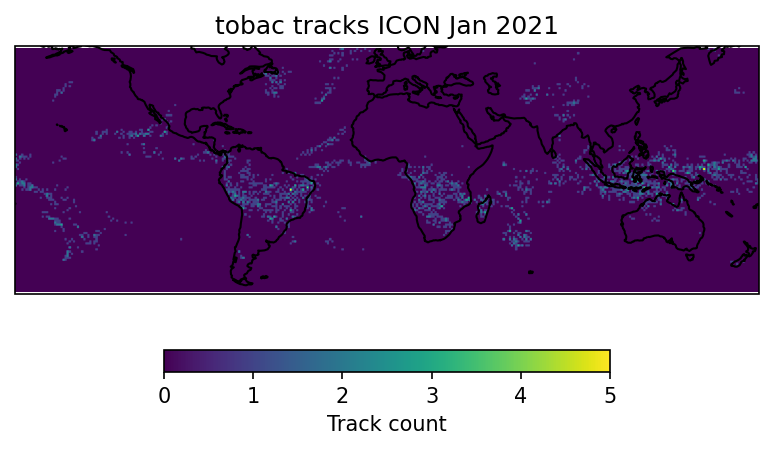

In [35]:
track_hist = np.histogram2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

img = ax.imshow(track_hist, extent=[0,360,60,-60])
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("tobac tracks ICON Jan 2021")

plt.colorbar(img, label="Track count", orientation="horizontal", shrink=0.6)

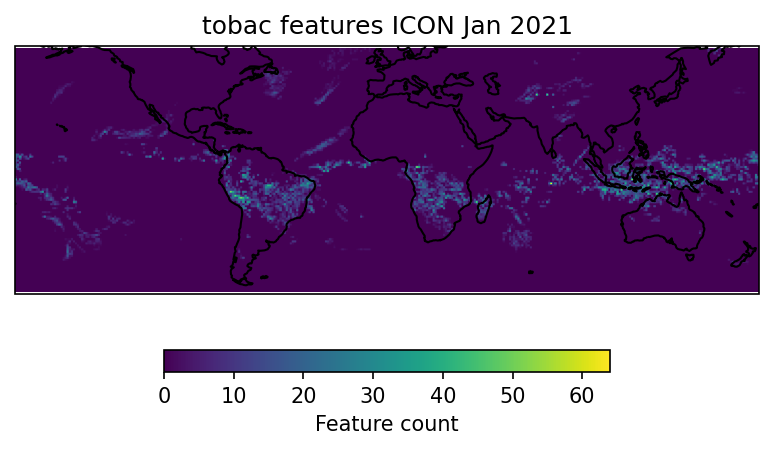

In [36]:
feature_hist = np.histogram2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)]
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

img = ax.imshow(feature_hist, extent=[0,360,60,-60])
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("tobac features ICON Jan 2021")

plt.colorbar(img, label="Feature count", orientation="horizontal", shrink=0.6)

In [37]:
from scipy.stats import binned_statistic_2d

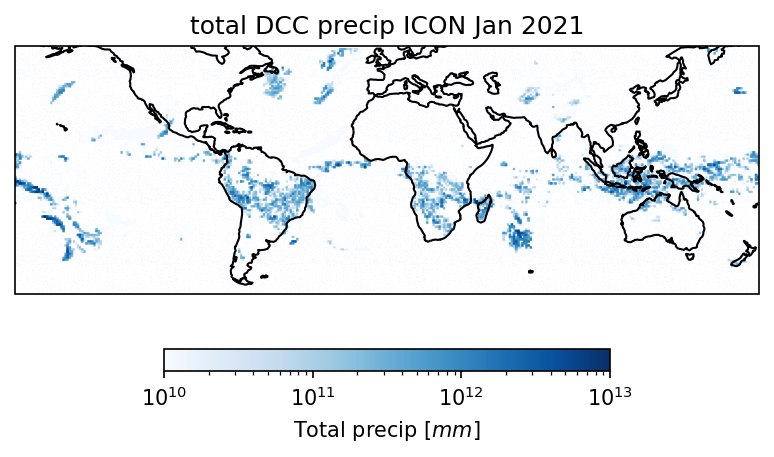

In [38]:
total_precip = binned_statistic_2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    tracks["total_precip"].to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nansum
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(total_precip, extent=[0,360,60,-60], norm=LogNorm(vmin=1e10, vmax=1e13), cmap="Blues")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("total DCC precip ICON Jan 2021")

plt.colorbar(img, label="Total precip [$mm$]", orientation="horizontal", shrink=0.6)

In [39]:
track_max_area = tracks.groupby("track").apply(
    lambda df: np.nanmax(
        df.groupby("time").area.sum().to_numpy()
    )
)

/tmp/ipykernel_342161/2347823151.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  track_max_area = tracks.groupby("track").apply(


In [40]:
track_max_area

track
1       4.257544e+10
2       8.994643e+10
3       6.552913e+10
4       4.940982e+11
5       5.657586e+10
            ...     
2949    1.729620e+10
2950    3.875755e+10
2951    6.684673e+09
2952    3.028363e+10
2954    9.843402e+10
Length: 2667, dtype: float64

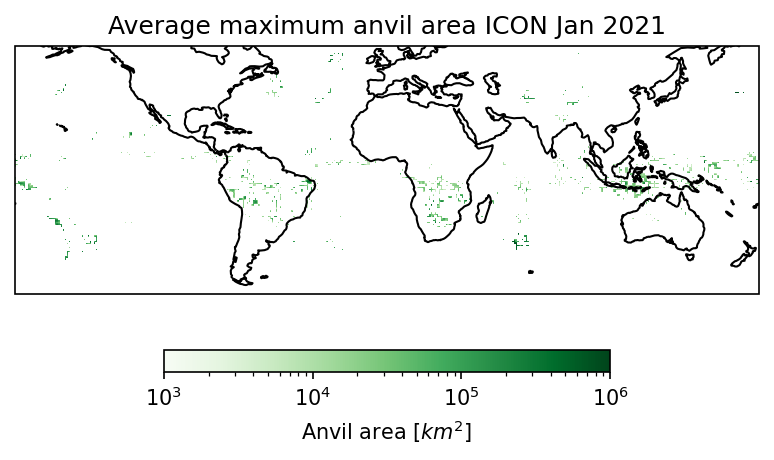

In [41]:
average_max_area = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    track_max_area.to_numpy() /1e6, 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(average_max_area, extent=[0,360,60,-60], norm=LogNorm(vmin=1e3, vmax=1e6), cmap="Greens")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average maximum anvil area ICON Jan 2021")

plt.colorbar(img, label="Anvil area [$km^{2}$]", orientation="horizontal", shrink=0.6)

In [42]:
tracks.min_BT

116       233.741135
252       224.841461
296       212.212372
297       221.150162
298       218.963867
             ...    
119847    223.512711
119848    222.883255
119849    220.668137
119850    218.406296
119851    217.044907
Name: min_BT, Length: 38289, dtype: float64

In [43]:
track_min_bt = tracks.groupby("track").min_BT.min()

In [44]:
track_min_bt

track
1       220.510818
2       222.921204
3       211.911697
4       217.018402
5       218.963867
           ...    
2949    201.775848
2950    216.852966
2951    190.740997
2952    203.922180
2954    222.846848
Name: min_BT, Length: 2667, dtype: float64

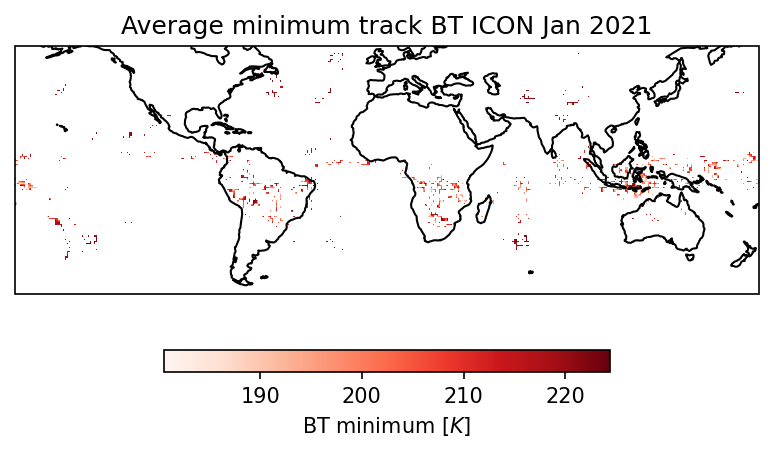

In [45]:
average_min_BT = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    track_min_bt.to_numpy(), 
    bins=[np.linspace(-60,60,121), np.linspace(0,360,361)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

# from matplotlib.colors import LogNorm
img = ax.imshow(average_min_BT, extent=[0,360,60,-60], cmap="Reds")
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average minimum track BT ICON Jan 2021")

plt.colorbar(img, label="BT minimum [$K$]", orientation="horizontal", shrink=0.6)

In [46]:
cells_per_track = tracks.groupby("track").cell.apply(lambda x: np.unique(x).size)

In [47]:
cells_per_track.max()

28

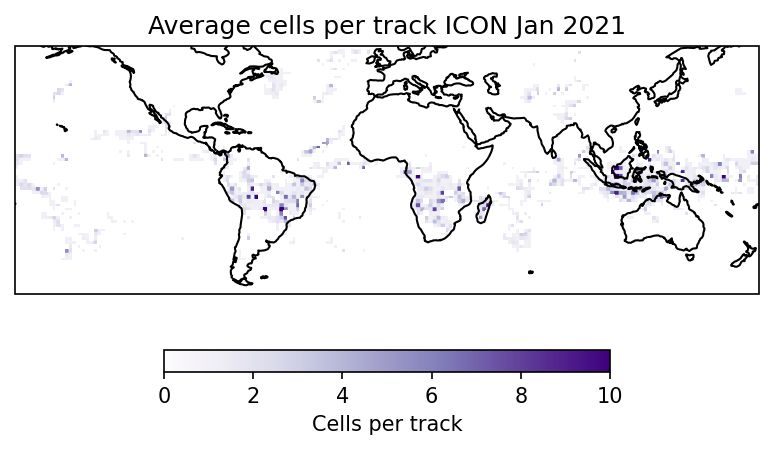

In [48]:
average_cells = binned_statistic_2d(
    track_latlon["lat"].to_numpy(), 
    track_latlon["lon"].to_numpy(), 
    cells_per_track.to_numpy(), 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)],
    statistic=np.nanmean
)[0]

fig, ax = plt.subplots(1, 1, dpi=150, figsize=(6.4, 3.2), subplot_kw=dict(projection=ccrs.PlateCarree()))

from matplotlib.colors import LogNorm
img = ax.imshow(average_cells, extent=[0,360,60,-60], cmap="Purples", vmin=0, vmax=10)
ax.coastlines()
ax.set_extent([-180,180,-60,60])
ax.set_title("Average cells per track ICON Jan 2021")

plt.colorbar(img, label="Cells per track", orientation="horizontal", shrink=0.6)

In [49]:
from scipy.stats import circmean

def circmean_hour(x):
    return circmean(x, high=24, low=0)


In [50]:
feature_local_hour = (
    (
        tracks.time.to_numpy() 
        - tracks.time.to_numpy().astype("datetime64[D]")
    ).astype(int)/3.6e12 + tracks.longitude.to_numpy()/15
)%24

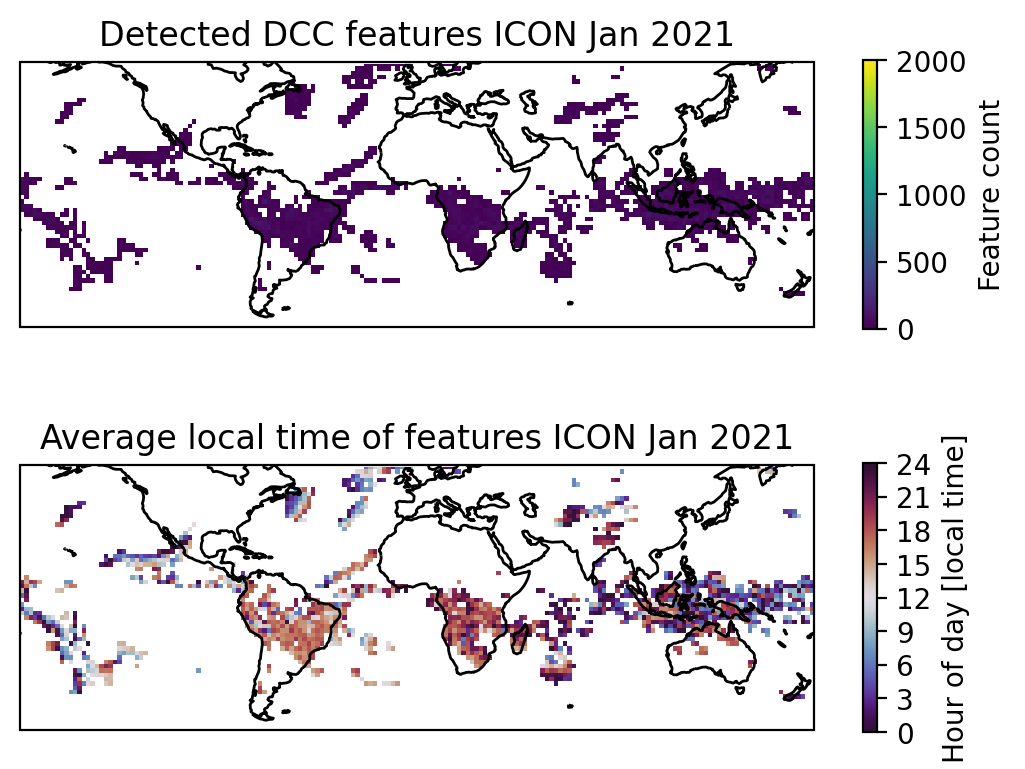

In [51]:
from numpy import ma

average_tod = binned_statistic_2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    feature_local_hour, 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)],
    statistic=circmean_hour
)[0]

fig, (ax1, ax2) = plt.subplots(2, 1, dpi=200, subplot_kw=dict(projection=ccrs.PlateCarree()))

feature_hist = np.histogram2d(
    tracks["latitude"].to_numpy(), 
    tracks["longitude"].to_numpy(), 
    bins=[np.linspace(-60,60,61), np.linspace(0,360,181)]
)[0] 

img = ax1.imshow(ma.array(feature_hist, mask=feature_hist==0), extent=[0,360,60,-60], interpolation="nearest", vmin=0, vmax=2000)
ax1.coastlines()
ax1.set_extent([-180,180,-60,60])
ax1.set_title("Detected DCC features ICON Jan 2021")

plt.colorbar(img, ax=ax1, label="Feature count", orientation="vertical", shrink=0.8)

img = ax2.imshow(average_tod, extent=[0,360,60,-60], cmap="twilight_shifted", vmin=0, vmax=24, interpolation="nearest")
ax2.coastlines()
ax2.set_extent([-180,180,-60,60])
ax2.set_title("Average local time of features ICON Jan 2021")

cbar = plt.colorbar(img, ax=ax2, label="Hour of day [local time]", orientation="vertical", shrink=0.8)
cbar.set_ticks(range(0,25,3))
# cax_r.yaxis.set_minor_locator(MultipleLocator(1))

In [52]:
tracks

,feature,frame,idx,hdim_1,hdim_2,detection_pixel_count,threshold_value,min_BT,time,timestr,latitude,longitude,segmentation_pixel_count,area,max_precip,total_precip,cell,time_cell,track,time_track
116,117,0,239,752.543860,2081.017544,57,241,233.741135,2020-01-01 00:15:00,2020-01-01 00:15:00,-15.304386,208.151754,57,6.791115e+09,3.234744e-14,5.077178e-05,117,0 days 00:00:00,1,0 days 00:00:00
252,253,0,510,734.511194,3125.052212,268,233,224.841461,2020-01-01 00:15:00,2020-01-01 00:15:00,-13.501119,312.555221,466,5.595599e+10,2.466133e-16,1.613206e-07,253,0 days 00:00:00,2,0 days 00:00:00
296,297,0,579,2.931034,139.241499,232,225,212.212372,2020-01-01 00:15:00,2020-01-01 00:15:00,59.656897,13.974150,813,5.149269e+10,5.647807e-16,2.850928e-07,297,0 days 00:00:00,3,0 days 00:00:00
297,298,0,580,36.105727,1579.823794,227,225,221.150162,2020-01-01 00:15:00,2020-01-01 00:15:00,56.339427,158.032379,7517,4.940982e+11,1.139653e-01,1.481525e+09,298,0 days 00:00:00,4,0 days 00:00:00
298,299,0,581,36.328467,922.277407,137,225,218.963867,2020-01-01 00:15:00,2020-01-01 00:15:00,56.317153,92.277741,831,5.657586e+10,7.896344e-03,4.799115e+07,299,0 days 00:00:00,5,0 days 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119847,119848,94,4055,978.695652,694.565217,23,225,223.512711,2020-01-01 23:45:00,2020-01-01 23:45:00,-37.919565,69.506522,2068,2.060993e+11,3.449074e+01,4.606328e+11,29813,0 days 02:30:00,2681,0 days 02:30:00
119848,119849,94,4056,979.842105,2202.473683,38,225,222.883255,2020-01-01 23:45:00,2020-01-01 23:45:00,-38.034211,220.297368,484,4.692677e+10,1.017282e+00,1.777747e+09,31543,0 days 01:30:00,2832,0 days 01:30:00
119849,119850,94,4057,996.972010,2133.177930,393,225,220.668137,2020-01-01 23:45:00,2020-01-01 23:45:00,-39.747201,213.367793,2963,2.811720e+11,6.189536e+00,8.558705e+10,31917,0 days 01:15:00,2868,0 days 01:15:00
119850,119851,94,4061,1011.580645,2891.048387,62,225,218.406296,2020-01-01 23:45:00,2020-01-01 23:45:00,-41.208065,289.154839,192,1.782736e+10,6.363353e+01,6.476473e+10,32681,0 days 00:45:00,2927,0 days 00:45:00


In [53]:
out_ds = tracks.set_index(tracks.feature).to_xarray()

out_ds = out_ds.rename_vars(
    {
        # "latitude": "feature_latitude",
        # "longitude": "feature_longitude",
        "time": "time_feature",
        "hdim_1": "y",
        "hdim_2": "x",
        # "num": "detection_pixel_count",
        # "feature_min_BT": "min_BT",
        # "ncells": "segmentation_pixel_count",
    }
)

In [54]:
out_ds

<xarray.Dataset> Size: 6MB
Dimensions:                   (feature: 38289)
Coordinates:
  * feature                   (feature) int64 306kB 117 253 ... 119851 119852
Data variables: (12/19)
    frame                     (feature) int64 306kB 0 0 0 0 0 ... 94 94 94 94 94
    idx                       (feature) int64 306kB 239 510 579 ... 4061 4062
    y                         (feature) float64 306kB 752.5 734.5 ... 1.023e+03
    x                         (feature) float64 306kB 2.081e+03 ... 2.898e+03
    detection_pixel_count     (feature) int64 306kB 57 268 232 227 ... 393 62 33
    threshold_value           (feature) int64 306kB 241 233 225 ... 225 225 225
    ...                        ...
    max_precip                (feature) float64 306kB 3.235e-14 ... 62.91
    total_precip              (feature) float64 306kB 5.077e-05 ... 8.096e+10
    cell                      (feature) int64 306kB 117 253 297 ... 32681 32682
    time_cell                 (feature) timedelta64[ns] 306kB 00:00:00 ... 00...
    track                     (feature) int64 306kB 1 2 3 4 ... 2868 2927 2928
    time_track                (feature) timedelta64[ns] 306kB 00:00:00 ... 00...

In [58]:
mcs_tracks[0].to_xarray()

<xarray.DataArray 0 (track: 2667)> Size: 3kB
array([False, False, False, ..., False, False, False])
Coordinates:
  * track    (track) int64 21kB 1 2 3 4 5 6 7 ... 2948 2949 2950 2951 2952 2954

In [61]:
out_ds = out_ds.assign_coords(mcs_tracks[0].to_xarray().coords)

In [62]:
out_ds["is_track_mcs"] = mcs_tracks[0].to_xarray()

In [60]:
out_ds

<xarray.Dataset> Size: 6MB
Dimensions:                   (feature: 38289)
Coordinates:
  * feature                   (feature) int64 306kB 117 253 ... 119851 119852
Data variables: (12/19)
    frame                     (feature) int64 306kB 0 0 0 0 0 ... 94 94 94 94 94
    idx                       (feature) int64 306kB 239 510 579 ... 4061 4062
    y                         (feature) float64 306kB 752.5 734.5 ... 1.023e+03
    x                         (feature) float64 306kB 2.081e+03 ... 2.898e+03
    detection_pixel_count     (feature) int64 306kB 57 268 232 227 ... 393 62 33
    threshold_value           (feature) int64 306kB 241 233 225 ... 225 225 225
    ...                        ...
    max_precip                (feature) float64 306kB 3.235e-14 ... 62.91
    total_precip              (feature) float64 306kB 5.077e-05 ... 8.096e+10
    cell                      (feature) int64 306kB 117 253 297 ... 32681 32682
    time_cell                 (feature) timedelta64[ns] 306kB 00:00:00 ... 00...
    track                     (feature) int64 306kB 1 2 3 4 ... 2868 2927 2928
    time_track                (feature) timedelta64[ns] 306kB 00:00:00 ... 00...